1.Matplotlib을 이용한 시각화  
https://matplotlib.org/3.1.1/gallery/index.html  
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html

1. 수치형 데이터 => 사칙연산 가능
 - 연속형 실수형태 (키, 몸무게)
 - 이산형 정수형태 (A반 학생수 , 인원수)
2. 범주형 데이터 => 사칙연산 불가
 - 순서형  순서있음    학점, 설문조사 점수
 - 명목형  순서없음    성별, 우편번호

위의 수치형에 따라 시각화 그래프가 조금씩 달라짐

수치형 1 개    

-히스토그램 plt.hist()  
-분포도 sns.diplot()  
-박스플롯 sns.boxplot()  

수치형 2개 이상(변수 관계 확인)
- 히트맵 sns.heatmap()
- 라인플롯 sns.linplot()
- 산점도 sns.scatterplot()
- 회귀선 + 산점도 sns.regplot()
- 페어플롯 sns.pairplot()  

=====================================================  
범주형 데이터 그래프 정리

범주형 데이터 변수 1개 시각화
- sns.countplot

범주형 2개 이상 시각화(변수간 관계 확인)
-막대그래프
-포인트 플롯
-박스플롯
-바이올린 플롯

In [2]:
# seaborn은 파이썬에서 통계적 데이터 시각화를 간편하고 아름답게 해주는 고급 시각화 라이브러리
# matplotlib 위에서 동작하며, 더 적은 코드로 더 예쁜 그래프를 그릴 수 있도록 설계
# 판다스에 좀더 특화 되어 있음

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

df_tips = sns.load_dataset("tips") # seaborn 안에는 엄청나게 유명한 머신러닝, 딥러닝, 데이터분석을 위한 데이터 예시를 몇 개 가지고 있음. 그 중 "tips" 라는 데이터.
df_tips.info()
# 분석
# 1. tips 데이터는 7개의 컬럼으로 이루어져 있다. 
# 2. 3개의 수치형 데이터와 4개의 범주형 데이터로 이루어져 있다. 
# 3. 결측치는 없으며, 244개의 행으로 이루어져 있다. 

df_tips.describe()
print(df_tips.head(100))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
    total_bill   tip     sex smoker  day    time  size
0        16.99  1.01  Female     No  Sun  Dinner     2
1        10.34  1.66    Male     No  Sun  Dinner     3
2        21.01  3.50    Male     No  Sun  Dinner     3
3        23.68  3.31    Male     No  Sun  Dinner     2
4        24.59  3.61  Female     No  Sun  Dinner     4
..         ...   ...     ...    ...  ...     ...   ...
95       40.17  4.73    Male    Yes  Fri  Dinner     4
96       27.28 

In [3]:
# 엑셀 파일로 데이터 저장
df_tips.to_excel("tips_all.xlsx", index=False)

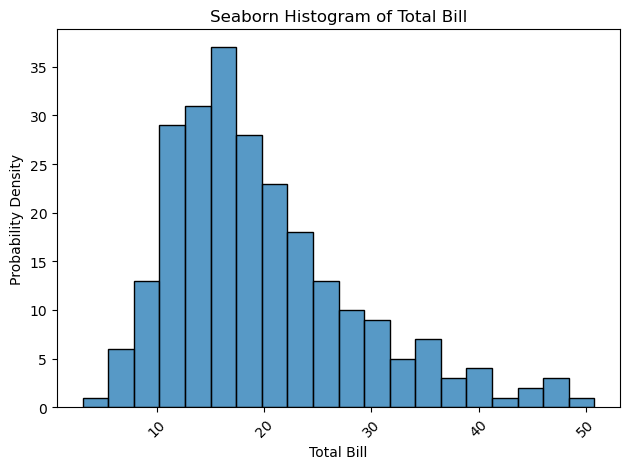

In [ ]:
# tips["total_bill"] 히스토그램을 Seaborn으로 그리기
sns.histplot(data=df_tips, x="total_bill", bins=20)
plt.xlabel("Total Bill")
plt.ylabel("Probability Density")
plt.title("Seaborn Histogram of Total Bill")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


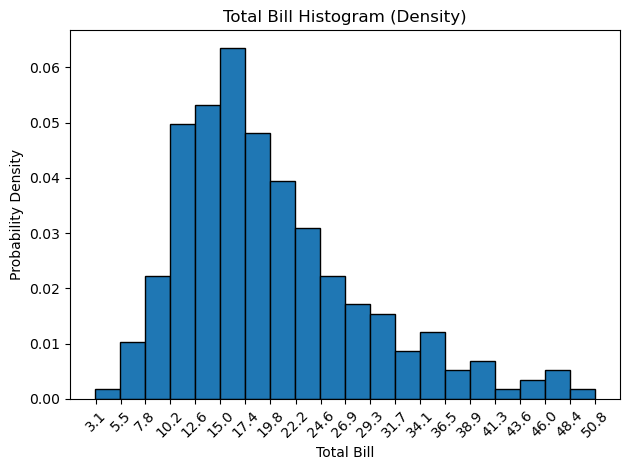

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 데이터 불러오기
tips = sns.load_dataset("tips")

# 히스토그램 정보
bins = 20
counts, bin_edges, _ = plt.hist(
    tips["total_bill"],
    bins=bins,
    density=True,  # 확률 밀도
    edgecolor='black'
)

# x축 눈금 수동 지정: bin 경계값들을 x축 눈금으로 설정
plt.xticks(np.round(bin_edges, 1), rotation=45)  # 필요하면 회전

plt.xlabel("Total Bill")
plt.ylabel("Probability Density")
plt.title("Total Bill Histogram (Density)")
plt.tight_layout()
plt.show()

In [7]:
# 수치로 확인
df_tips["total_bill"].describe()

# 분석
# total_bill 최대 50.810000 최소 3.070000 평균 19.785943 임을 확인할 수 있다. 

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

<Axes: ylabel='total_bill'>

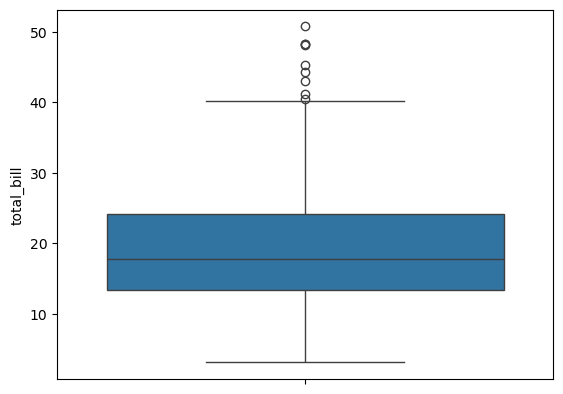

In [8]:
# 2. 박스플롯
#3) 박스플롯(Boxplot)
#전체 분포 현황을 직관적으로 보여준다면,
#boxplot은 박스와 수염 모양으로 여러 가지 정보를 알려준다. (최솟값, 최댓값, Q1, Q2(중위수), Q3 값)
#형태는 sns.boxplot(x or y, data)
sns.boxplot(tips["total_bill"])

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


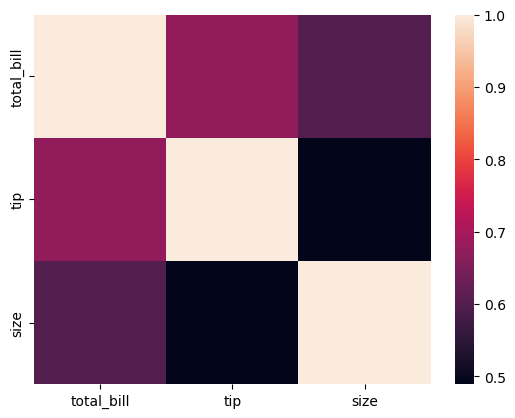

In [14]:
# 3. 수치형 변수 2개 이상 시각화(변수 간 관계 확인)

#1) 히트맵(heatmap)
#보통 히트맵은 수치형 변수들 간의 상관관계를 나타낼 때 자주 사용한다.

#tips 데이터셋의 상관계수를 구해보자. corr() 함수를 사용한다.
#히트맵 예전버전과 에러
#https://twdatastory.tistory.com/entry/tipscorr-ValueError-could-not-convert-string-to-float-No

tip_corr = tips.corr(numeric_only=True) # 피어슨 상관계수
print(tip_corr)

sns.heatmap(tip_corr)
plt.show()

# 분석
#팁과 전체 금액과 상관관계가 있으며 size 와는 별 관계가 없음
#절댓값이 1에 가까운 상관계수: 매우 확고한 상관.

#피어슨 상관관계 설명
#https://dd0za-1004.tistory.com/46

#공분산의 이해
#https://ds92.tistory.com/124



<Axes: xlabel='size', ylabel='tip'>

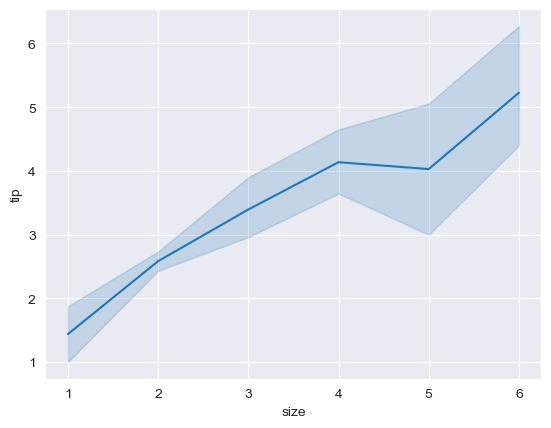

In [25]:
# 라인 플롯 

# 라인플롯은 두 수치형 데이터 사이의 관계를 선으로 나타낸다. 
# x 축에는 이산형(discrete) 데이터, y축에는 연속형(continuous) 데이터를 쓸 때 사용한다. 
# 그 이유는 x값에 따른 y값의 평균값을 선으로 이어주기 때문이다. 
# 형태는 sns.lineplot(x,y,hue(범주형),data)

# 두 수치형 데이터 size, tip 간 관계를 시각화

# 스타일 설정
# style: 'white', 'dark', 'whitegrid', 'darkgrid'
sns.set_style('darkgrid')

sns.lineplot(x='size', y='tip', data=df_tips)

# 분석
# 1. 인원수가 증가할수록 팁도 증가하는 경향이 있다. 
# 2. 변동성이나 이상값도 해당 그래프에서 그림자로 확인이 가능하다. 

# 결론
# "식사 인원 수가 많아질수록 평균적으로 팁도 많아지는 경향이 있다."

<Axes: xlabel='total_bill', ylabel='tip'>

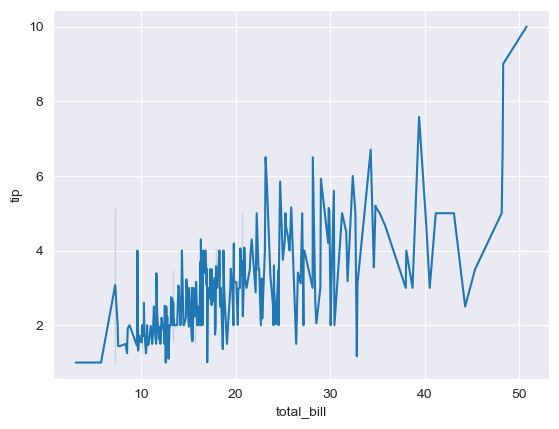

In [31]:
# x,y 둘다 연속형을 쓰면? 이상해짐
sns.lineplot(x='total_bill', y='tip', data=df_tips)

# 결론
# 연속형 데이터를 라인플롯으로 x,y 축으로 쓰면 안됨. 

<Axes: xlabel='total_bill', ylabel='tip'>

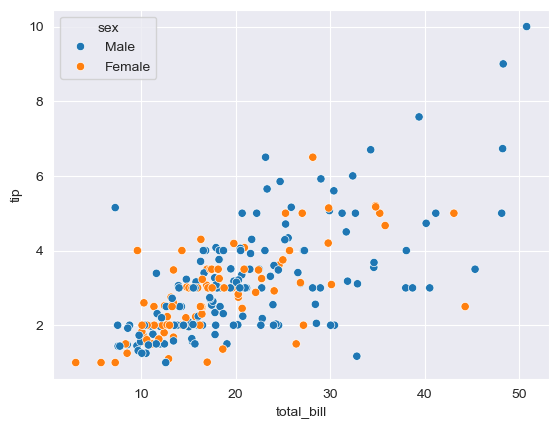

In [36]:
#주로 x, y축에 모두 연속형 데이터를 넣을 때 자주 사용한다.
#형태는 sns.scatterplot(x, y, hue(범주형), data)

# 성별에 따라 색상이 다르게 표시
# 남성과 여성의 패턴 차이를 쉽게 시각적으로 구별할 수 있음
# hue 옵션에 따른 패턴 차이를 인식

sns.scatterplot(x='total_bill', y='tip', data=df_tips, hue='sex') # hue 는 옵션

# 분석
# 1. 총금액이 클수록 팁오 많아지는 경향이 있다. 
# 2. 남성과 여성의 패턴 차이를 쉽게 시각적으로 구별이 불가
# 3. 이상치도 그래프로 좀더 쉽게 구별 가능하다. 

<Axes: xlabel='size', ylabel='tip'>

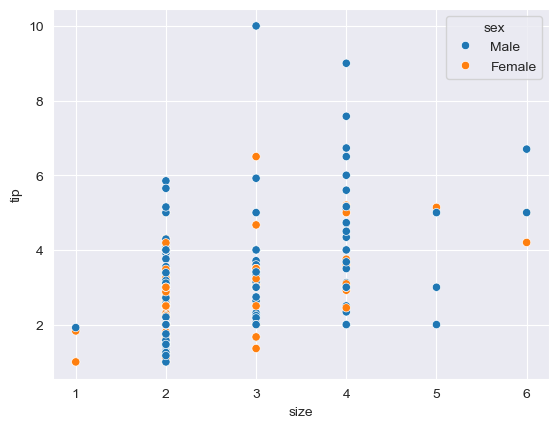

In [39]:
sns.scatterplot(x='size', y='tip', hue='sex', data=df_tips)

# 분석
# 산점도에서 x축에 범주형 변수도 분석이 가능하다. 
# 식사인원이 많을수록 평균적으로 팁 금액이 증가하는 경향은 있으나, 그렇다고 완전히 선형적이지는 않으며
# 인원수가 커도 팁이 꼭 많지는 않다

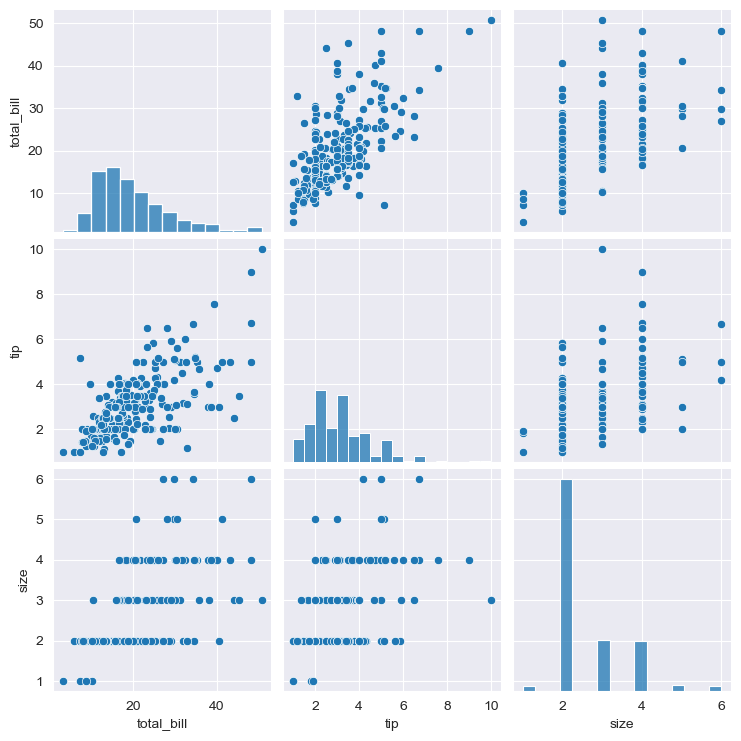

In [43]:
# 페어 플롯
# seaborn 간판 가장 강력한 기능
# 데이터 수치형 변수들의 쌍별 관계를 한눈데 보여주는 시각화 기능
# 자기가 알아서 이산형, 연속형 구분해서 히스토 그램 및 산점도 각각에 대응해서 그려줌
# 산점도와 히스토그램 그래프를  각 변수 간의 모든 가능한 조합을 2차원 그래프로 그려줌

# x, y 데이터가 같으면 (지꺼는) 히스토그램 (분산) 으로 표현. 박스플롯/히스토그램
# x, y 가 둘다 수치형일 때는 산점도. 

sns.pairplot(df_tips)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


<Axes: xlabel='day', ylabel='count'>

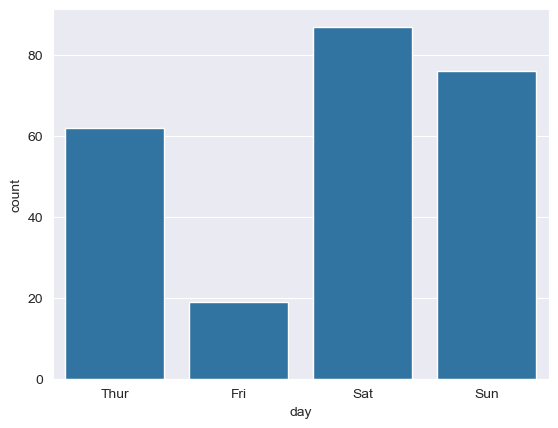

In [49]:
# 범주형 데이터 그래프 정리 
# 범주형 데이터 변수 1개 시각화

df_tips.info()

sns.countplot(x='day', data=df_tips)

<Axes: xlabel='smoker', ylabel='count'>

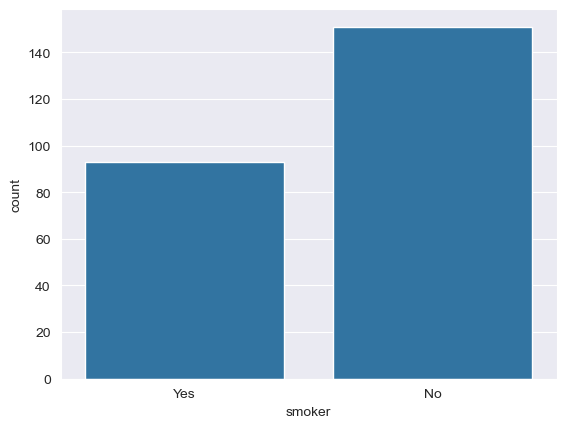

In [52]:
# smoker 를 countplot 으로 나타내시오
sns.countplot(x='smoker', data=df_tips)

<Axes: xlabel='sex', ylabel='tip'>

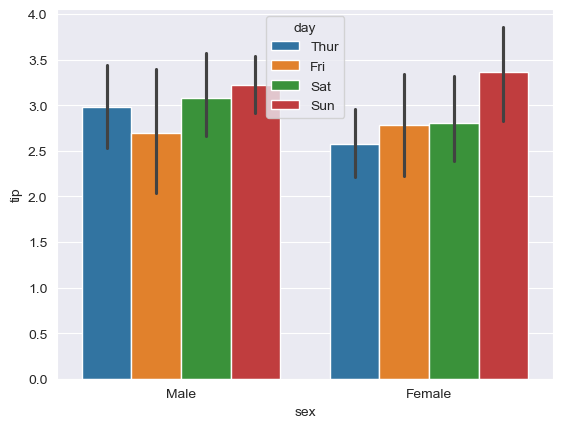

In [62]:
# 범주형 2개 이상 시각화(변수간 관계 확인)
# 막대 그래프
# 포인트 플롯
# 박스플롯
# 바이올린 플롯

# 검은 세로선은 해당 평균의 95% 신뢰구간
# male의 팁 평균이 3.0이고, 검은선이 2.5~3.5라면: 
# 실제 평균 팁이 이 범위 안에 있을 확률이 95% 라는 통계적 의미 

sns.barplot(x='sex', y='tip', hue='day', data=df_tips)

<Axes: xlabel='day', ylabel='tip'>

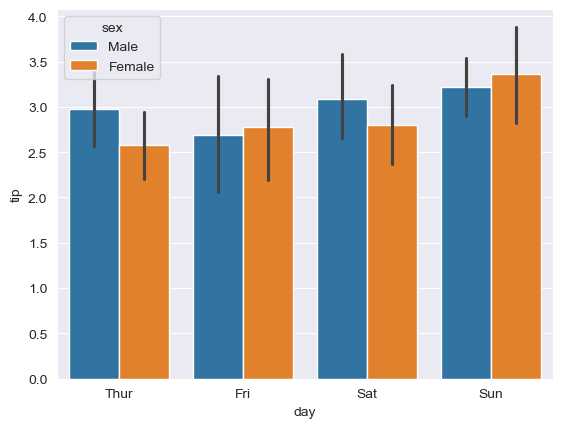

In [61]:
# 요일에 따른 tip 평균을 그래프로 표현 하시오. 
sns.barplot(x='day', y='tip', hue='sex', data=df_tips)

# 분석
# 주말일수록 팁을 더 내는 경향이 있다. 

<Axes: xlabel='sex', ylabel='tip'>

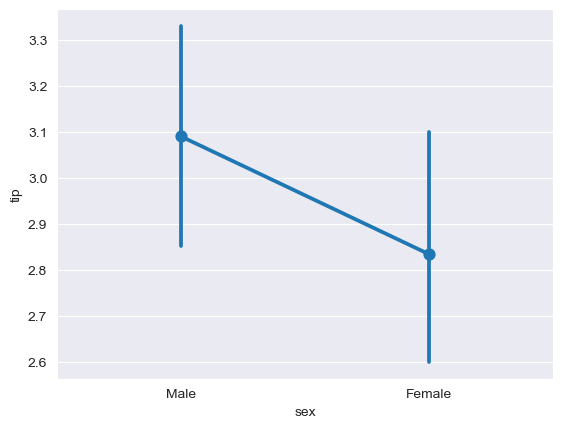

In [63]:
sns.pointplot(x='sex', y='tip', data=df_tips)

<Axes: xlabel='day', ylabel='total_bill'>

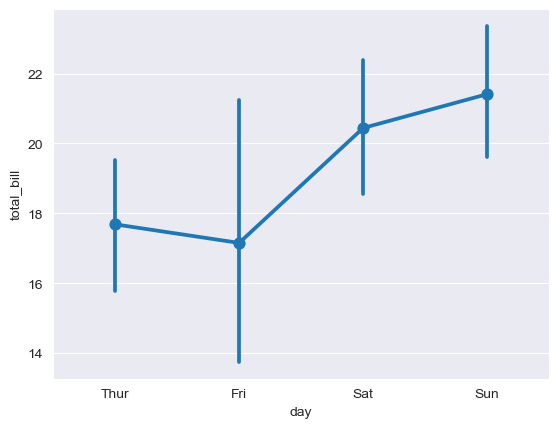

In [66]:
# 요일별 total_bill 평균값을 포인트 플롯으로 그리시오. 

sns.pointplot(x='day', y='total_bill', data=df_tips)

<Axes: xlabel='time', ylabel='total_bill'>

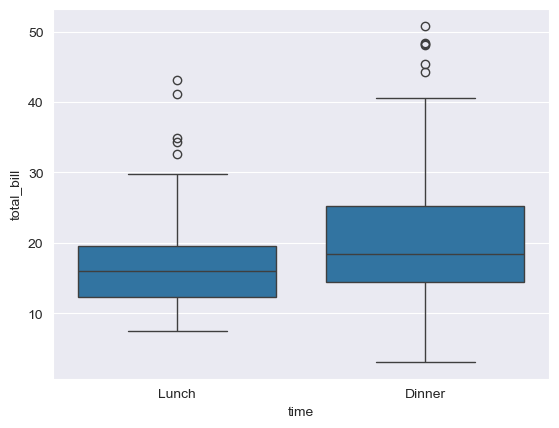

In [ ]:
sns.boxplot(x='time', y='total_bill', data=df_tips)

# 분석 
# 1. 저녁이 점심보다 더 많이 씀
# 2. 점심은 상대적으로 변동성이 작고, 중앙값도 낮다 => 점심은 간단히 저녁은 다양하고 고가로 먹는 경향이 있다. 
# 3. 점심 데이터가 중위값 근처에 몰린 데이터가 많다. 

# 결론
# 점심은 간단히 저녁은 다양하고 고가로 

<Axes: xlabel='time', ylabel='total_bill'>

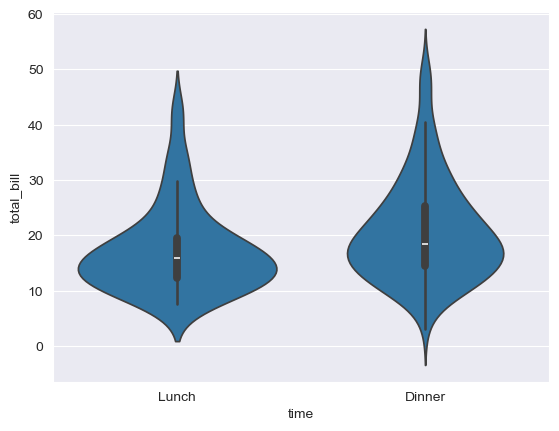

In [68]:
# 바이올린 플롯
# boxplot 분포는 확인 하기 좋음
# 분산이 어떤지 확인 하기 어려움

#분산을 확인 하기 위한게, 바이올린 그래프임
sns.violinplot(x="time",y="total_bill",data=tips)

#분석
# 1.저녁시간의 식사 금액이 전반적으로 크고 다양함
# 2.점심은 대체로 저렴하고 균일한 금액 분포
# 3.저녁식사에 고가 식사가 존재 할수 있음
#결론
#가장 중위수가 몰린 것은 점심 때임(가운데 쪽으로 볼록 하게 튀어 나왔으므로)

<Axes: xlabel='time', ylabel='total_bill'>

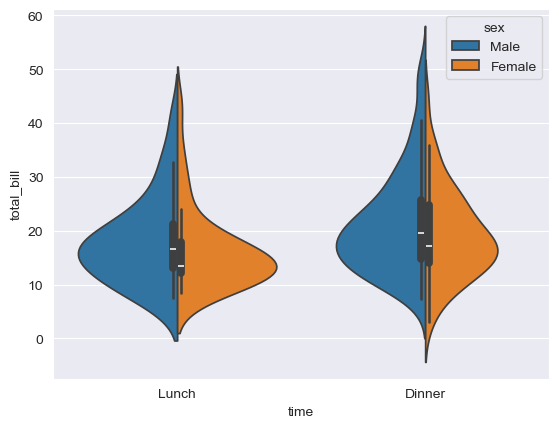

In [71]:
sns.violinplot(x='time', y='total_bill', hue='sex', data=df_tips, split=True)

      sex     count
0    Male  0.643443
1  Female  0.356557


([<matplotlib.patches.Wedge at 0x1a9ddce2ba0>,
 [Text(-0.47909437653273873, 0.9901861331965351, 'Male'),
  Text(0.47909422701878684, -0.990186205537762, 'Female')],
 [Text(-0.2613242053814938, 0.54010152719811, '64.34%'),
  Text(0.2613241238284292, -0.5401015666569611, '35.66%')])

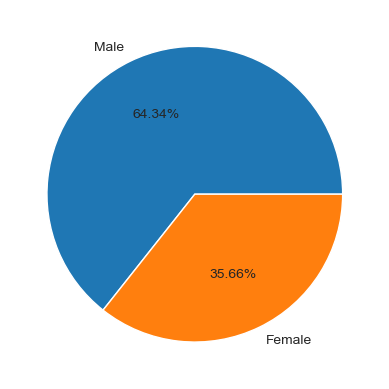

In [72]:
# 씨본은 파이차트를 제공하지 않음
# 파이챠트
import pandas as pd
df_new = pd.DataFrame(tips['sex'].value_counts()/ tips['sex'].count() )
df_new.reset_index(inplace=True)
print(df_new)
plt.pie(x = list(df_new['count']),
        labels =list(df_new['sex']),
        autopct='%.2f%%'
        )